In [1]:
import pandas as pd
df=pd.read_csv(r'D:\Others\DB\new\2014JointData.csv')



C:\Users\techi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
pd.set_option("display.max_columns",100)

In [3]:

df3=df.loc[df['CopayInnTier1Unit'] == 'Copay after deductible']
df3=df3.loc[df['CopayInnTier1Value'] != -1]
df3=df3.loc[df['CoinsInnTier1Value'] >=0 ]
df3=df3.loc[df['IssuerActuarialValue'] != -1 ]


In [4]:
df4=df3[['IndividualRate', 'IsEHB','IsStateMandate','CopayInnTier1Value','CoinsInnTier1Value',\
         'DiseaseManagementProgramsNumber','NationalNetwork','IssuerActuarialValue','MetalLevel',]]

In [5]:
df4=df4.dropna(axis=0, how='any')
df4.MetalLevel.value_counts()

Low     36530
High    32186
Name: MetalLevel, dtype: int64

In [6]:


df4.IsEHB=df4.IsEHB.str.upper()
df4.IsEHB=df4.IsEHB.str.replace('NO','0')
df4.IsEHB=df4.IsEHB.str.replace('YES','1')
df4.IsEHB=df4.IsEHB.astype(int)

df4.IsStateMandate=df4.IsStateMandate.str.upper()
df4.IsStateMandate=df4.IsStateMandate.str.replace('NO','0')
df4.IsStateMandate=df4.IsStateMandate.str.replace('YES','1')
df4.IsStateMandate=df4.IsStateMandate.astype(int)

df4.NationalNetwork=df4.NationalNetwork.str.upper()
df4.NationalNetwork=df4.NationalNetwork.str.replace('NO','0')
df4.NationalNetwork=df4.NationalNetwork.str.replace('YES','1')
df4.NationalNetwork=df4.NationalNetwork.astype(int)

#df4.MetalLevel=df4.MetalLevel.str.replace("Low","1")
#df4.MetalLevel=df4.MetalLevel.str.replace("High","3")
#df4.MetalLevel=df4.MetalLevel.str.replace("Bronze","1")
#df4.MetalLevel=df4.MetalLevel.str.replace("Silver","2")
#df4.MetalLevel=df4.MetalLevel.str.replace("Gold","3")
#df4.MetalLevel=df4.MetalLevel.str.replace("Platinum","4")
#df4.MetalLevel=df4.MetalLevel.str.replace("Catastrophic","0")
df4.MetalLevel=df4.MetalLevel.str.replace("Low","0")
df4.MetalLevel=df4.MetalLevel.str.replace("High","1")
df4.MetalLevel=df4.MetalLevel.astype(int)

In [7]:
import pyspark
spDF = sqlContext.createDataFrame(df4)
rdd1 = spDF.rdd
#data=rdd1.map(lambda line: LabeledPoint(line[0],[line[1:]]))

In [8]:
from pyspark.ml.linalg import DenseVector

data=rdd1.map(lambda line:(line[0],DenseVector(line[1:])))
data = spark.createDataFrame(data, ["label", "features"])

In [9]:
train1,test1=data.randomSplit([.8,.2],seed=321)

In [10]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
lrModel = lr.fit(train1)

In [11]:
predicted = lrModel.transform(test1)
predicted.show()


+-----+--------------------+------------------+
|label|            features|        prediction|
+-----+--------------------+------------------+
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,0.0,0.0,...|14.437112985485243|
| 7.82|[0.0,0.0,2.0,0.0,...|14.434185843

In [12]:
p=predicted.toPandas() 

In [13]:
from sklearn.metrics import r2_score

r2_score(p.label, p.prediction)

0.39645853255006269

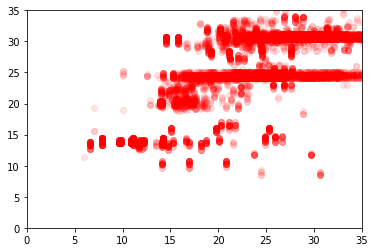

In [30]:
import matplotlib.pyplot as plt
plt.plot(p.label, p.prediction, 'ro',alpha=0.1)
plt.show()

In [14]:
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [-0.491479725287,0.0,-0.00146357094994,-0.818573163903,0.0,10.9225187808,2.81118847506,-35.972600716]
Intercept: -182.62719911595718
